In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv(r'C:\Users\MEHTA\Documents\projects\mlproject\notebook\data\data.csv')

In [3]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [4]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [5]:
X = df.drop("Purchase",axis=1)
y=df['Purchase']

In [6]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((440054, 22), (110014, 22))

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4625.2220
- Mean Absolute Error: 3531.0046
- R2 Score: 0.1530
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4617.6299
- Mean Absolute Error: 3526.3926
- R2 Score: 0.1514


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 2231.2262
- Mean Absolute Error: 1494.5672
- R2 Score: 0.8029
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3353.0923
- Mean Absolute Error: 2366.4579
- R2 Score: 0.5525


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2291.6847
- Mean Absolute Error: 1651.1631
- R2 Score: 0.7921
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3057.8936
- Mean Absolute Error: 2224.0764
- R2 Score: 0.6278


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 2831.5911
- Mean Absolute 

In [11]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,XGBRegressor,0.668952
2,Random Forest Regressor,0.627850
1,Decision Tree,0.552529
0,Linear Regression,0.151383


In [12]:
xgb_model = XGBRegressor(fit_intercept=True)
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

[18:56:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "fit_intercept" } are not used.

 Accuracy of the model is 66.90


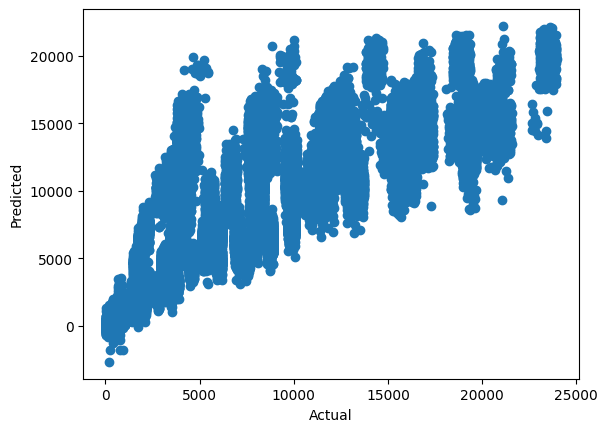

In [13]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

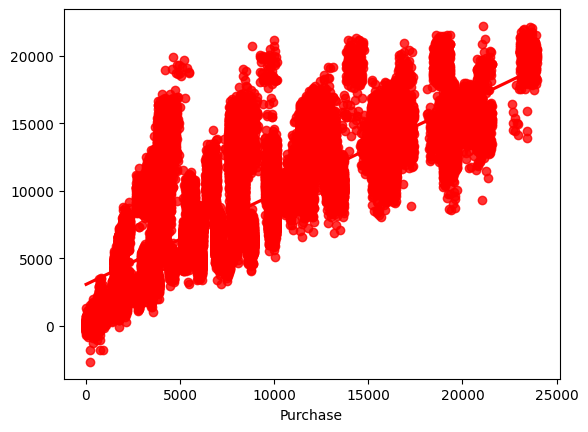

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
84432,19142,15266.410156,3875.589844
72724,15513,14022.069336,1490.930664
197032,7802,6983.228027,818.771973
353704,15455,13749.348633,1705.651367
91198,4492,15841.238281,-11349.238281
...,...,...,...
133324,19139,14185.102539,4953.897461
138718,7856,7127.089844,728.910156
22886,4037,7018.612793,-2981.612793
137110,7467,3811.660889,3655.339111
